
# Frage 1 – Notebook 03: Plots

Dieses Notebook erzeugt alle Visualisierungen:
- Index-Plot **nominal vs. real** (Lebensmitteleinzelhandel) für die letzten 5 Jahre,
- Balkendiagramm zur **Veränderung des Warenkorbwerts**,
- horizontales Balkendiagramm zu **Aspekten erhöhter Zahlungsbereitschaft**.


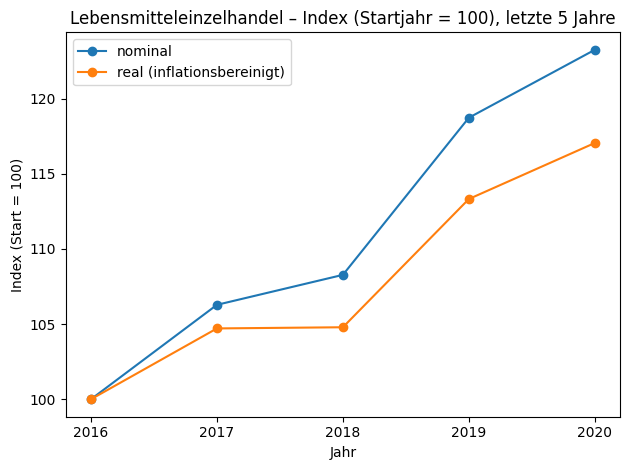

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pathlib import Path

project_root = Path.cwd()
out_imgs = project_root / "Frage1" / "Bilder"
out_imgs.mkdir(parents=True, exist_ok=True)

df5 = pd.read_csv(project_root / "warenkorb_auswertung_5J.csv")
ver = pd.read_csv(project_root / "umfrage_warenkorb_verteilung.csv")
asp = pd.read_csv(project_root / "umfrage_warenkorb_aspekte.csv")

def to_index(series):
    base = float(series.iloc[0])
    return series / base * 100.0

# Plot 1: Index LM nominal vs real
fig, ax = plt.subplots()
ax.plot(df5["Jahr"], to_index(df5["LM_Umsatz_nom"]), marker="o", label="nominal")
ax.plot(df5["Jahr"], to_index(df5["LM_Umsatz_real"]), marker="o", label="real (inflationsbereinigt)")
ax.set_title("Lebensmitteleinzelhandel – Index (Startjahr = 100), letzte 5 Jahre")
ax.set_xlabel("Jahr"); ax.set_ylabel("Index (Start = 100)")
ax.legend()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(out_imgs / "warenkorb_index_lm_5J.png", dpi=300)
plt.show()


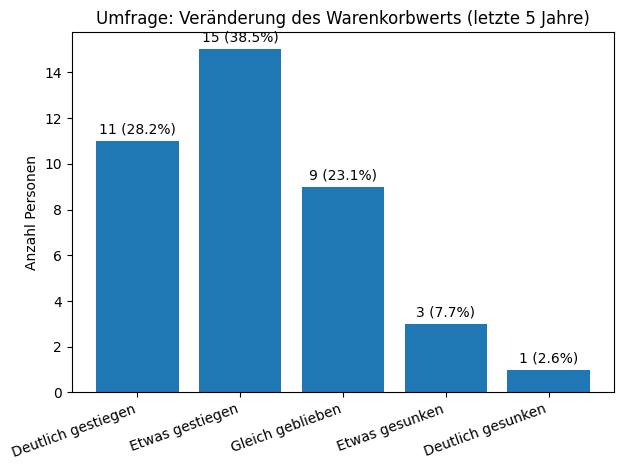

In [6]:

# Plot 2: Veränderung Warenkorbwert
fig1, ax1 = plt.subplots()
ax1.bar(ver["Antwort"], ver["Anzahl"])
for i, r in ver.iterrows():
    ax1.text(i, r["Anzahl"] + 0.2, f'{int(r["Anzahl"])} ({r["Anteil_%"]}%)', ha="center", va="bottom")
ax1.set_title("Umfrage: Veränderung des Warenkorbwerts (letzte 5 Jahre)")
ax1.set_ylabel("Anzahl Personen")
plt.xticks(rotation=20, ha="right")
fig1.tight_layout()
fig1.savefig(out_imgs / "umfrage_warenkorb_verteilung.png", dpi=300)
plt.show()


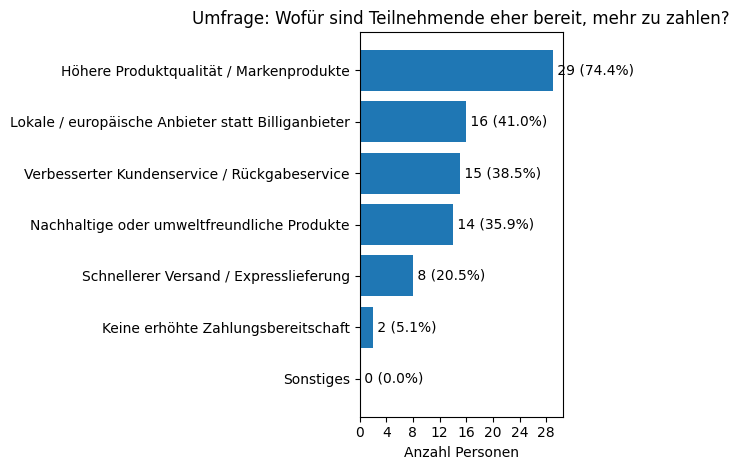

In [7]:

# Plot 3: Aspekte (horizontal)
asp_sorted = asp.sort_values("Anzahl")
fig2, ax2 = plt.subplots()
ax2.barh(asp_sorted["Aspekt"], asp_sorted["Anzahl"])
for i, (v, p) in enumerate(zip(asp_sorted["Anzahl"], asp_sorted["Anteil_%"])):
    ax2.text(v, i, f" {int(v)} ({p}%)", va="center")
ax2.set_title("Umfrage: Wofür sind Teilnehmende eher bereit, mehr zu zahlen?")
ax2.set_xlabel("Anzahl Personen")
ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
fig2.tight_layout()
fig2.savefig(out_imgs / "umfrage_warenkorb_aspekte.png", dpi=300)
plt.show()
